In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os


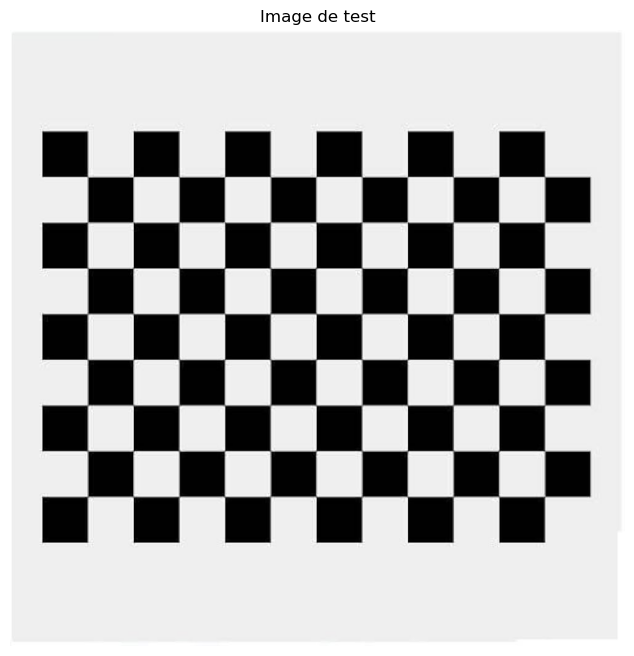

In [3]:

images_path = 'images_calibration/image_test.jpg'  # Ajuste l'extension si nécessaire (.png, .jpeg, etc.)

# Lire toutes les images




img_test = cv2.imread(images_path)
img_test_rgb = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 8))
plt.imshow(img_test_rgb)
plt.title("Image de test")
plt.axis('off')
plt.show()


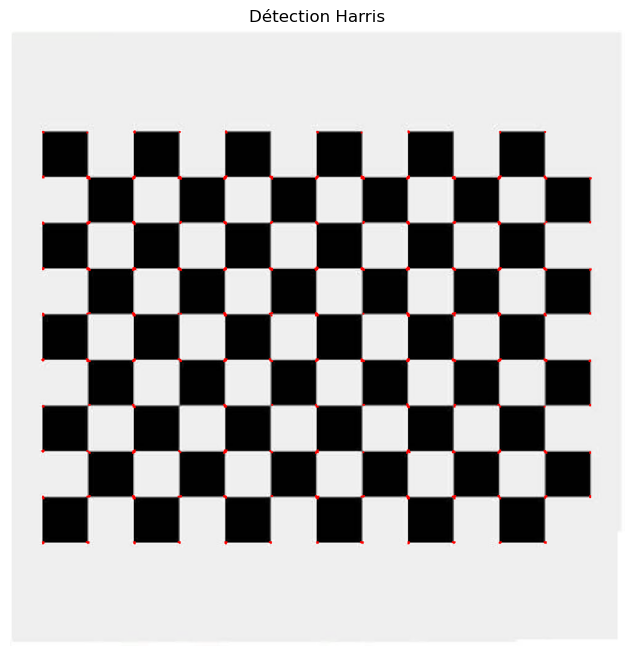

In [4]:

img = img_test_rgb
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

# Détection Harris
harris = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Dilatation pour marquer les coins
harris = cv2.dilate(harris, None)

# Marquer les coins en rouge (seuil à 0.05 * max)
img[harris > 0.05 * harris.max()] = [0, 0, 255]

# Afficher
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Détection Harris")
plt.axis('off')
plt.show()

In [ ]:
CHECKERBOARD = (6,9)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.01)
 
# Creating vector to store vectors of 3D points for each checkerboard image
objpoints = []
# Creating vector to store vectors of 2D points for each checkerboard image
imgpoints = [] 
 
 
# Defining the world coordinates for 3D points
objp = np.zeros((1, CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)
prev_img_shape = None
 
# Extracting path of individual image stored in a given directory
images = glob.glob('images_calibration/image_test.jpg')
for i , fname in enumerate( images ):
    print("Processing image :", i)
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    # If desired number of corners are found in the image then ret = true
    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)
     
    """
    If desired number of corner are detected,
    we refine the pixel coordinates and display 
    them on the images of checker board
    """
    if ret == True:
        objpoints.append(objp)
        print("good for image:", fname)
        # refining pixel coordinates for given 2d points.
        corners2 = cv2.cornerSubPix(gray, corners, (11,11),(-1,-1), criteria)
         
        imgpoints.append(corners2)
 
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)
     
    cv2.imshow('img',img)
    cv2.waitKey(0)
 
cv2.destroyAllWindows()
 
h,w = img.shape[:2]
 
# """
# Performing camera calibration by 
# passing the value of known 3D points (objpoints)
# and corresponding pixel coordinates of the 
# detected corners (imgpoints)
# """
# ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
 
# print("Camera matrix : \n")
# print(mtx)
# print("dist : \n")
# print(dist)
# print("rvecs : \n")
# print(rvecs)
# print("tvecs : \n")
# print(tvecs)

Processing image : 0


[]
